In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Cleaning
* Combine and align data into Monthly Stock File (MSF)
* Use 3-Dimensional data structure as descriptor

In [2]:
msf_raw = pd.read_csv('data/msf.csv')
indx = pd.MultiIndex.from_arrays(msf_raw.iloc[:, :2].values.T,
                                 names=['permno', 'date'])
col = ['TICKER', 'COMNAM', 'SICCD', 'RET',
       'BIDLO', 'ASKHI', 'PRC', 'VOL', 'SHROUT', 'vwretd', 'sprtrn']
msf = pd.DataFrame(data=msf_raw.loc[:, col].copy().values,
                   index=indx,
                   columns=col)

c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
finr_raw = pd.read_csv('data/finratiofirm.csv')
indx = pd.MultiIndex.from_arrays(finr_raw.iloc[:, [0, 3]].values.T,
                                 names=['permno', 'date'])
col = ['bm', 'pe_inc', 'roe', 
       'GProf', 'debt_assets', 'at_turn', 'ptb', 'divyield']
finr = pd.DataFrame(data=finr_raw.loc[:, col].copy().values,
                    index=indx,
                    columns=col)
finr = finr.reindex(pd.MultiIndex.from_product(finr.index.levels, names=['permno', 'date']))

In [4]:
fff = pd.read_csv('data/mfff.csv').set_index('dateff')
fff.index.rename('date', inplace=True)

In [5]:
indx = pd.MultiIndex.from_product(
    [msf.index.levels[0].join(finr.index.levels[0], how='inner'),
     msf.index.levels[1].join(finr.index.levels[1])],
    names=['permno', 'date'])

In [6]:
msf = msf.reindex(indx).join(finr.reindex(indx))
msf.index.set_levels(pd.to_datetime(msf.index.levels[1]), level=1, inplace=True)

In [7]:
l = slice(None)
ll = (slice(None), slice(None))
msf.loc[ll, 'divyield'] = msf.loc[ll, 'divyield'].astype('str').str.replace('%', '').astype('f') / 100
msf.loc[ll, 'rf'] = np.tile(fff.rf.values, indx.levels[0].shape)
msf.loc[ll, 'eps'] = msf.loc[ll, 'pe_inc'].fillna(method='ffill') / msf.loc[ll, 'PRC']

In [8]:
mesh = msf.SICCD.astype('str').str.contains('[a-zA-Z]+', regex=True)
msf.loc[mesh, 'SICCD'].unique()

array([nan, 'Z'], dtype=object)

In [9]:
msf

TICKER            COMNAM SICCD        RET   BIDLO    ASKHI  \
permno date                                                                    
10001  2007-01-31   EWST   ENERGY WEST INC  4920   0.023279    11.1  -11.525   
       2007-02-28   EWST   ENERGY WEST INC  4920   0.261621    11.2    14.19   
       2007-03-30   EWST   ENERGY WEST INC  4920   0.019732   13.81    14.87   
       2007-04-30   EWST   ENERGY WEST INC  4920   0.002764   13.74    15.05   
       2007-05-31   EWST   ENERGY WEST INC  4920   0.043418   14.23     15.2   
       2007-06-29   EWST   ENERGY WEST INC  4920   0.000667   14.75    15.41   
       2007-07-31   EWST   ENERGY WEST INC  4920  -0.056667   14.15       15   
       2007-08-31   EWST   ENERGY WEST INC  4920   0.027562   13.01   -14.54   
       2007-09-28   EWST   ENERGY WEST INC  4920  -0.032325   13.36       15   
       2007-10-31   EWST   ENERGY WEST INC  4920  -0.040259   12.94     14.4   
       2007-11-30   EWST   ENERGY WEST INC  4920   0.079401   13.35    14.25   
       2007-12-31   EWST   ENERGY WEST INC  4920  -0.003930   13.59    15.25   
       2008-01-31   EWST   ENERGY WEST INC  4920  -0.006082   13.23    14.45   
       2008-02-29   EWST   ENERGY WEST INC  4920   0.021704     8.8    13.81   
       2008-03-31   EWST   ENERGY WEST INC  4920  -0.052516    7.78     9.65   
       2008-04-30   EWST   ENERGY WEST INC  4920  -0.036698    7.55      9.3   
       2008-05-30   EWST   ENERGY WEST INC  4920   0.271628    8.75     11.4   
       2008-06-30   EWST   ENERGY WEST INC  4920  -0.010092   10.21     11.2   
       2008-07-31   EWST   ENERGY WEST INC  4920  -0.053023    9.04    11.19   
       2008-08-29   EWST   ENERGY WEST INC  4920  -0.019724    9.31     10.3   
       2008-09-30   EWST   ENERGY WEST INC  4920  -0.137374     7.5    -9.85   
       2008-10-31   EWST   ENERGY WEST INC  4920  -0.018824    6.55     8.75   
       2008-11-28   EWST   ENERGY WEST INC  4920  -0.130121    6.07     8.42   
       2008-12-31   EWST   ENERGY WEST INC  4920   0.155989   6.795     8.26   
       2009-01-30   EWST   ENERGY WEST INC  4920   0.034140    8.27   8.9899   
       2009-02-27   EWST   ENERGY WEST INC  4920   0.056222    8.15     8.94   
       2009-03-31   EWST   ENERGY WEST INC  4920  -0.080537    7.02      8.2   
       2009-04-30   EWST   ENERGY WEST INC  4920   0.044621    7.68     8.85   
       2009-05-29   EWST   ENERGY WEST INC  4920   0.002941     8.4    9.089   
       2009-06-30   EWST   ENERGY WEST INC  4920   0.019446    8.16    9.025   
...                  ...               ...   ...        ...     ...      ...   
93436  2014-09-30   TSLA  TESLA MOTORS INC  9999  -0.100185  242.68   286.04   
       2014-10-31   TSLA  TESLA MOTORS INC  9999  -0.004038  221.67   260.62   
       2014-11-28   TSLA  TESLA MOTORS INC  9999   0.011667  230.97   258.68   
       2014-12-31   TSLA  TESLA MOTORS INC  9999  -0.090422  197.81   231.64   
       2015-01-30   TSLA  TESLA MOTORS INC  9999  -0.084574  191.87   219.31   
       2015-02-27   TSLA  TESLA MOTORS INC  9999  -0.001277  202.88   220.99   
       2015-03-31   TSLA  TESLA MOTORS INC  9999  -0.071653     185  202.435   
       2015-04-30   TSLA  TESLA MOTORS INC  9999   0.197489  187.59   232.45   
       2015-05-29   TSLA  TESLA MOTORS INC  9999   0.109489  226.03   251.45   
       2015-06-30   TSLA  TESLA MOTORS INC  9999   0.069617  245.92   268.79   
       2015-07-31   TSLA  TESLA MOTORS INC  9999  -0.007866  253.01   282.26   
       2015-08-31   TSLA  TESLA MOTORS INC  9999  -0.064212  218.87   270.13   
       2015-09-30   TSLA  TESLA MOTORS INC  9999  -0.002650  238.63    264.2   
       2015-10-30   TSLA  TESLA MOTORS INC  9999  -0.166948  206.93   247.57   
       2015-11-30   TSLA  TESLA MOTORS INC  9999   0.112743  207.19   232.36   
       2015-12-31   TSLA  TESLA MOTORS INC  9999   0.042343  217.02   240.01   
       2016-01-29   TSLA  TESLA MOTORS INC  9999  -0.203367  188.07   223.43   
       2016-02-29 

## 2. Factor Construction
* Clean basic factor from market and fundimental data
* Calculate factor loading (exposure) as timeseries

> 0. Market Return:  
  $vwretd$

> 1. Volatility  
  $\displaystyle log(\frac{ASKHI}{BIDLO})$

In [10]:
np.isnan(msf.loc[ll, 'ASKHI'].astype('f').values).sum()

318625

In [11]:
mesh = msf.loc[ll, 'BIDLO'].astype('str').str.contains('.', regex=False)
msf.loc[np.logical_not(mesh), 'BIDLO'].unique()

array([nan], dtype=object)

In [12]:
msf.loc[ll, 'volatility'] = msf.loc[ll, ['ASKHI', 'BIDLO']].astype('f').groupby(level=0).apply(np.log).dot([1,-1]).values

c:\python36\lib\site-packages\pandas\core\groupby\groupby.py:2273: RuntimeWarning: invalid value encountered in log
  res = f(group)


> 2. Momentum:  
  $\sum_t{log(1 + RET_t) - log(1 + rf_t)}$

In [13]:
mesh = msf.loc[ll, 'RET'].astype('str').str.contains('.', regex=False)
msf.loc[np.logical_not(mesh), 'RET'].unique()

array([nan, 'B', 'C'], dtype=object)

In [14]:
msf.loc[ll, 'RET'] = msf.loc[ll, 'RET'].replace({'B': 'NaN', 'C': 'NaN'})

In [15]:
msf.loc[ll, 'momentum'] = \
    (1 + msf.loc[ll, ['RET', 'rf']].astype('f')).groupby(level=0).apply(np.log).rolling(3).sum().dot([1,-1]).values

> 3. Size:  
  $log(PRC * SHROUT)$

In [16]:
np.isnan(msf.loc[ll, 'PRC'].astype('f').values).sum()

321354

In [20]:
msf.loc[ll, 'size'] = np.log((msf.loc[ll, 'PRC'] * msf.loc[(l, l), 'SHROUT']).astype('f'))

c:\python36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


> 4. Size Nonlinearity:  
  $log^3(PRC * SHROUT)$

In [21]:
msf.loc[ll, 'size_nl'] = msf.loc[ll, 'size'] ** 3

> 5. Trading Activity:  
  $\displaystyle\frac{\sum_t{VOL}}{\frac{1}{T}\sum_t{SHROUT}}$

In [23]:
msf.loc[ll, 'trading_activity'] = (msf.loc[ll, 'VOL'].groupby(level=0).rolling(6).sum().values 
                                   / msf.loc[ll, 'SHROUT'].groupby(level=0).rolling(6).mean().values)

> 6. Growth:  
  $\displaystyle\frac{EPT_T - EPT_{T-1}}{EPS_T + EPS_{T-1}}$

In [37]:
eps_t = msf.loc[ll, 'eps'].groupby(level=0).rolling(12).sum()
eps_t0 = eps_t.values
eps_t1 = eps_t.groupby(level=0).shift(1).values
# moins = np.r_[np.array([-1] * 6), np.array([1] * 6)]
# ajouter = np.array([1] * 12)
msf.loc[ll, 'growth'] = (eps_t0 - eps_t1) / (eps_t0 + eps_t1)

> 7. Earning Yield:  
  $\displaystyle\frac{\frac{1}{T}\sum_t{EPS}}{\frac{1}{T}\sum_t{PRC}}$

In [38]:
msf.loc[ll, 'earning_yield'] = (msf.loc[ll, 'eps'].groupby(level=0).rolling(12).mean().values 
                                / msf.loc[ll, 'PRC'].groupby(level=0).rolling(12).mean().values)

> 8. Value:  
  $\displaystyle\frac{1}{ptb}$

In [44]:
msf.loc[ll, 'value'] = 1 / msf.loc[ll, 'ptb'].fillna(method='ffill')

> 9. Earning Variability:  
  $\displaystyle\frac{\sigma^2(EPS)}{\mathbb{E}(EPS)}$

In [41]:
msf.loc[ll, 'earning_variability'] = (msf.loc[ll, 'eps'].groupby(level=0).rolling(12).var().values 
                                      / msf.loc[ll, 'eps'].groupby(level=0).rolling(12).mean().values)

> 10. Leverage:  
  $debt\_assets$

> 11. Dividend Yield:  
  $divyield$

In [47]:
_coef = lambda x: np.linalg.inv(x[:,1:].T.dot(x[:,1:])).dot(x[:,1:].T).dot(x[:,0])

In [48]:
factors = ['vwretd', 'volatility', 'momentum', 'size', 'size_nl', 'trading_activity', 'growth',
           'earning_yield', 'value', 'earning_variability', 'debt_assets', 'divyield']
f = pd.DataFrame([], index=msf.index.levels[1], columns=factors)
for date, df in msf.loc[ll, (['RET'] + factors)].groupby(level=1):
        _df = df.astype('f').dropna()
        if not _df.empty:
            _df.RET = _df.RET.shift(1)
            f.loc[date, :] = _coef(_df.values[1:,:])

In [49]:
f

,vwretd,volatility,momentum,size,size_nl,trading_activity,growth,earning_yield,value,earning_variability,debt_assets,divyield
date,,,,,,,,,,,,
2007-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


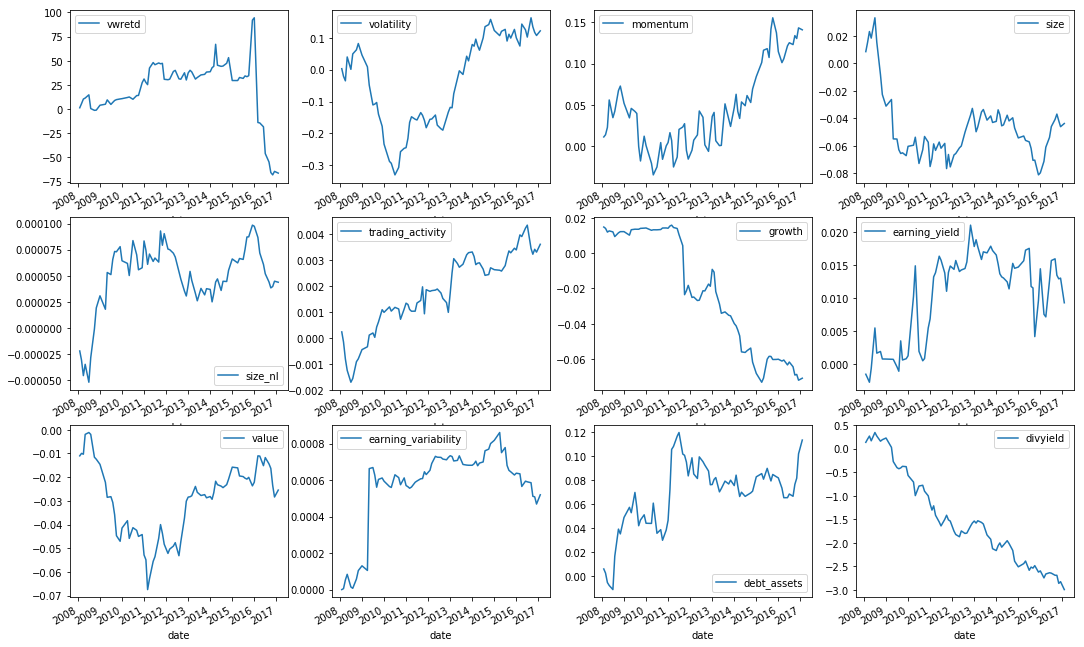

In [59]:
fig = plt.figure(figsize=(18, 12))
i = 0
for factor in factors:
    i = i + 1
    ax = fig.add_subplot(3, 4, i)
    f[factor].dropna().cumsum().plot(ax=ax, legend=True)